# Bagaimana Cara Menggabungkan Pandas Series/Dataframe?

Sebagai seorang praktisi data, pasti sering kali bertemu dengan banyak file sekaligus dan data yang dibutuhkan tersebar di berbagai file tersebut dan membutuhkan metode untuk menggabungkan semua informasi yang dibutuhkan dari setiap file itu.

Dengan menggunakan excel atau tools pengolah spreadsheet lain hal itu bisa terjadi mungkin dengan menggunakan copy paste file satu ke file lainnya atau yang agak canggih menggunakan method importRange di google sheets. Tetapi tentu hal itu tidak bisa diandalkan ketika berurusan dengan big data yang datanya bisa milyaran rows dengan informasi yang tidak terbatas, Python dan Pandas adalah satu-satunya cara untuk mengatasinya.

Terdapat beberapa metode untuk menggabungkan Series/Dataframe di Pandas, yaitu:

    1.append
    2.concat
    3.merge
    4.join

Akan dibahas satu persatu dalam subbab berikutnya

# Append

Method .append() dapat digunakan pada dataframe/series yang ditujukan untuk menambah row-nya saja. Jika di SQL memiliki 2 tabel atau lebih maka dapat menggabungkannya secara vertikal dengan Union. Jadi SQL Union ekuivalen dengan method .append() di Pandas.

Perhatikan contoh berikut, mulai dengan method .append pada series
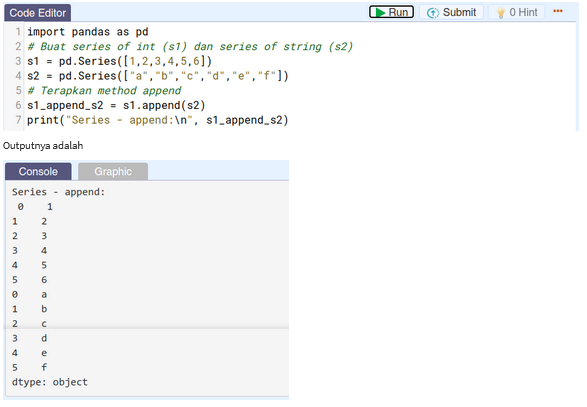

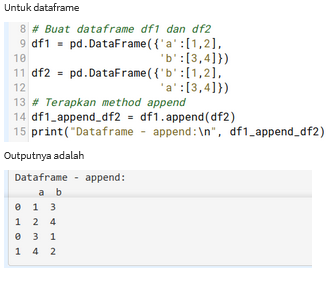

Tugas Praktek:

Untuk prakteknya terapkanlah method append dengan series s1 dan dataframe df1 ditempatkan setelah series s2 dan dataframe df2 masing-masingnya.

In [1]:
import pandas as pd
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series(["a", "b", "c", "d", "e", "f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


# Concat

Method .concat() dapat digunakan pada dataframe yang ditujukan untuk penggabungan baik dalam row-wise (dalam arah ) atau column-wise. 

Perhatikan contoh berikut, mulai dengan method .concat pada row-wise
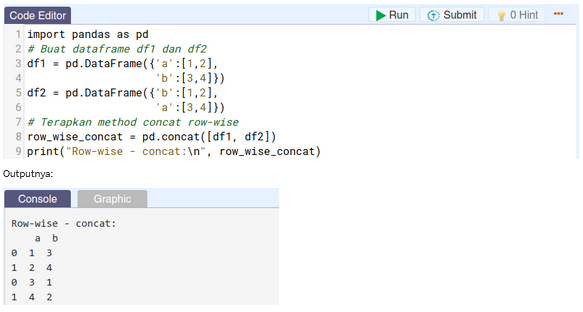

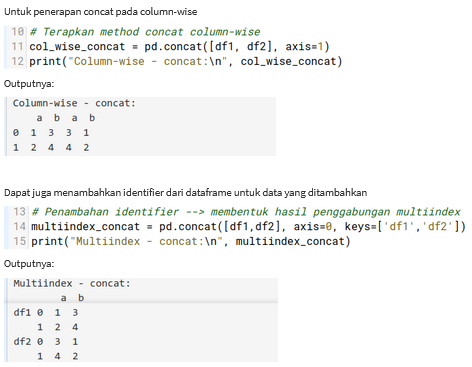

Tugas Praktek:

Balikkanlah posisi kedua dataframe yang akan digabungkan dengan concat. 

In [2]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2, df1])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2, df1], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2,df1], axis=0, keys=['df1','df2'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    b  a  a  b
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        b  a
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


# Merge - Part 2

Penggunaan method .merge yang telah dipelajari pada part 1 adalah untuk dataframe dengan index tunggal.

Bagaimana jika salah satu dataframe atau keseluruhan dataframe yang akan digabungkan tersebut memiliki multiindex?

In [3]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
  'key':['k1','k2','k3','k4','k5'],
  'val1':[200, 500, 0, 500, 100],
  'val2':[30, 50, 100, 20, 10]
}).set_index(['key','val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
  'key':['k1','k3','k5','k7','k10'],
  'val3':[1,2,3,4,5],
  'val4':[6,7,8,8,10]
}).set_index(['key','val3'])
print('Dataframe 2:\n', df2)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10


Cara mengatasinya adalah dengan mereset index pada kedua dataframe, kemudian merge akan mendeteksi common single/multi column di kedua dataframe dan melakukan merge,

In [4]:
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(),df2.reset_index())
print('Merging dataframe:\n', df_merge)

Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


# Join

Metthod .join() digunakan pada dataframe untuk menggabungkan kedua data dengan set index pada kedua tabel tersebut sebagai join key, tanpa index, hal ini tidak akan berhasil.

Untuk tipe join yang lain (contoh=inner), harus menspecify keyword how='inner' 

Tugas Praktek:

Lakukanlah seperti yang dicontohkan tetapi penggabungan dengan method join berupa outer join.

In [5]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


# Pendahuluan

Kotak masuk emailku tak hentinya menerima sejumlah link baru dari Andra untuk bab-bab yang akan kupelajari di modul Pandas part 2 ini. Banyak sekali referensi dari Andra!

“Pivot, Melt, Stack, dan Unstack, apa ini?” gumamku sendiri membaca subject email Andra.

Aku pun bergegas mengaksesnya:

Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

 

Melakukan format ulang pada dataset itu sangatlah penting, biasanya hal ini dilakukan untuk mengetahui keseluruhan data secara cepat dengan chart atau visualisasi. Untuk orang yang sudah mahir menggunakan spreadsheet pastilah tau banyak tentang fitur pivot ini.

Di Pandas, ada beberapa teknik untuk melakukan pivot atau unpivot yang biasa disebut as melt di Pandas, terdapat pula konsep stack yang artinya menumpuk data dengan kolom yang lebih sedikit (stack) sama seperti konsep melt dan ada pula yang memperluas data dengan kolom yang lebih banyak (unstack) sama seperti konsep pivot.

# Dataset

Untuk memahami konsep pivot, melt, stack, dan unstack pada Pandas mari persiapkan dataset sederhana terlebih dahulu.
Tugas Praktek:

Carilah unique records/value pada keempat kolom dataframe 'data'.

In [6]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


# Pivot

Untuk menerapkan menerapkan method .pivot() pada dataframe dapat dilakukan pada dataframe yang miliki index tunggal ataupun indexnya adalah multiindex.

 

Untuk dataset yang masih sama, yaitu data.

In [7]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])

Pivoting dengan multiple column measurement

In [8]:
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)

Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60


Pivoting dengan multiple column measuremen

In [9]:
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


Penjelasan:

Apa yang berbeda dari kedua code di atas? Pada code pertama di specify values mana yang akan dilakukan pivot sedangkan di kedua tidak specific mana yang akan dilakukan pivot maka Pandas secara default men-treat kolom yang ada selain yang telah di specify as index dan columns as values instead.

# Pivot_table

Apa yang terjadi kalau output pivot tabel memiliki duplicate index? Seperti yang diketahui, index di dataframe adalah unique identifier untuk setiap row, jadi tidak boleh ada duplikat dan setiap membuat pivot tabel, harus specify index as kolom yang mana dan columns nya memakai kolom yang mana.
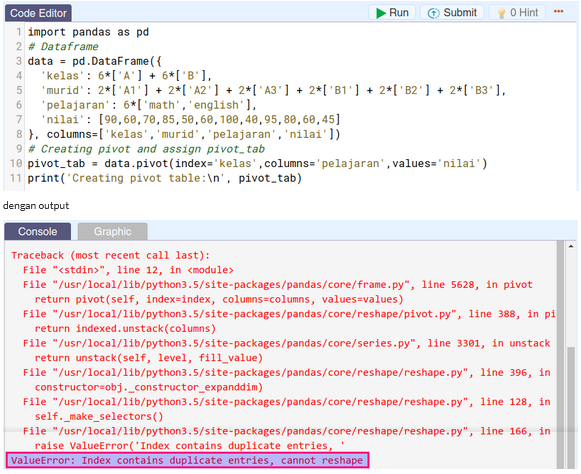

Hal ini dapat diatasi dengan melakukan method .pivot_table() pada dataframe. Metode ini sama seperti melakukan pivot pada tabel tapi juga melakukan groupby dan aggregation (aggfunc) pada level rows sehingga dipastikan tidak ada duplicate index di rows (secara default aggfunc = 'mean').

Perhatikan cuplikan berikut ini
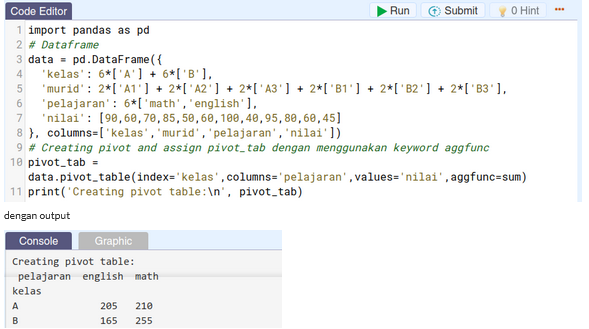

Keyword aggfunc yang digunakan pada method .pivot_table() dapat menggunakan nilai berikut:

    1.'sum'
    2.'mean'
    3.'median'

 

Tugas Praktek:

Seperti yang dicontohkan untuk meng-create pivot tabel dengan method .pivot_table() tetapi aggfunc yang digunakan adalah 'mean' dan 'median'.

In [10]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


# Melt - Part 1

Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

Mari diperhatikan kembali dataframe yang telah digunakan sebelumnya dan dataframenya sudah dipivot.

In [11]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


Akan melakukan teknik melting pada dataframe output di atas.

[1] Melting dataframe

In [12]:
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)

Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85


[2] Dengan menspesifikasi keyword argument id_vars yang ditujukan untuk membuat fix kolom yang sebagai id tiap barisnya

In [13]:
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


# Melt - Part 2

Mari melanjutkan ke bagian kedua dari penggunaan teknik melt ini. Mari lihat kembali dataframe yang telah diperoleh melalui pivoting

In [14]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


Lanjutkan dengan melakukan teknik melting pada dataframe output di atas untuk keyword argumen lainnya, yaitu

[3] Dengan menspesifikasikan keyword argument value_vars yang digunakan untuk menampilkan variasi value apa saja yang perlu dimunculkan di kolom variable.

In [15]:
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)


Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0


[4] Dengan spesifikasikan keyword argument var_name dan value_name yang digunakan untuk menampilkan nama kolom untuk variable dan value

In [16]:
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english', 'math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran      nilai
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


# Stack & Unstack - Part 1

Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

 

Perhatikan kembali dataframe berikut dengan multi index-nya.

In [17]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas', 'murid', 'pelajaran'])
print('Dataframe multi index:\n', data)

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45


Mari terapkan bagaimana menggunakan teknik stacking dan unstacking ini pada dataframe multi index 'data':

[1] Unstackinng dataframe

In [18]:
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)

Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85   70
      A3         60   50
B     B1         40  100
      B2         80   95
      B3         45   60


[2] Unstacking dengan specify level name

dengan outputnya di console

In [19]:
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)

Unstacking dataframe dengan level name:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


[3] Unstacking dengan specify level position

In [20]:
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Unstacking dataframe dengan level position:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


# Stack & Unstack - Part 2

Dalam bagian kedua dari Stack & Unstack ini akan membahas stacking dataframe. Untuk itu, mari diperhatikan dataframe berikut ini

In [21]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0


[1] Stacking dataframe 

In [22]:
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)

Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0


[2] Tukar posisi index setelah stacking dataframe

In [23]:
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1, 2)
print('Swapped data:\n', data_swap)

Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
      A2    math        70.0
      A3    math        50.0
B     B1    english     40.0
      B2    english     80.0
      B3    english     45.0
      B1    math       100.0
      B2    math        95.0
      B3    math        60.0


[3] Melakukan sort_index pada stacking dataframe

In [24]:
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Sorted data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
            math        90.0
      A2    english     85.0
            math        70.0
      A3    english     60.0
            math        50.0
B     B1    english     40.0
            math       100.0
      B2    english     80.0
            math        95.0
      B3    english     45.0
            math        60.0


# Pendahuluan

Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview.

Basic Concept of Groupby & Aggregation

Groupby memiliki konsep untuk

    1.Split: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok
    2.Apply: menerapkan fungsi pada masing-masing kelompok tersebut
    3.Combine: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe


# Review Inspeksi Data

Mari review kembali terkait dengan inspeksi data yang pernah dilakukan pada modul sebelumnya. Akan menggunakan dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv

[1] Load data dari csv

In [26]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())

Lima data teratas:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2                    1.0

[2] Melakukan pengecekan terhadap data

In [27]:
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   timestamp               4000 non-null   object 
 6   unit                    4000 non-null   object 
 7   source_name             4000 non-null   object 
 8   latitude                4000 non-null   float64
 9   longitude               4000 non-null   float64
 10  averaged_over_in_hours  3634 non-null   float64
dtypes: float64(4), object(7)
memory usage: 343.9+ KB
Info global_air_quality:
 None


[3] Melakukan count tanpa groupby

In [28]:
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())

Count tanpa groupby:
 location                  3997
city                      3966
country                   4000
pollutant                 4000
value                     4000
timestamp                 4000
unit                      4000
source_name               4000
latitude                  4000
longitude                 4000
averaged_over_in_hours    3634
dtype: int64


[4] Melakukan count dengan groupby

In [29]:
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

Count dengan groupby (5 data teratas):
              location  city  country  pollutant  value  timestamp  unit  \
source_name                                                               
ARPALAZIO          72    72       72         72     72         72    72   
Agaar.mn           27    27       27         27     27         27    27   
AirNow           1712  1681     1715       1715   1715       1715  1715   
Andalucia          71    71       71         71     71         71    71   
Anqing              4     4        4          4      4          4     4   

             latitude  longitude  averaged_over_in_hours  
source_name                                               
ARPALAZIO          72         72                      72  
Agaar.mn           27         27                       0  
AirNow           1715       1715                    1715  
Andalucia          71         71                      71  
Anqing              4          4                       4  


Terdapat perbedaan antara melakukan count dengan groupby dan tanpa groupby,

    1.Terdapat index apa yang di specify as groupby
    2.Perhitungan jadi berdasarkan apa yang di specify as groupby
    3.Overall, lebih mudah untuk membaca data summary yang telah di groupby


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 1

Pada subbab ini akan menerapkan groupby dan fungsi aggregasi mean dan std untuk menentukan nilai rata-rata dan standar deviasi dari masing-masing kelompok data dari dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv dan diassign sebagai variabel df_gaq.

Akan buat variabel pollutant 

In [30]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0


[1] Group berdasarkan country dan terapkan aggregasi mean, method .mean() setelah penerapan method .groupby() digunakan untuk mencari rata-rata dari tiap kelompok

In [31]:
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())

Rata-rata pollutant (5 teratas):
           value                                                         \
pollutant    bc          co        no2        o3       pm10       pm25   
country                                                                  
AR          0.0    0.000000   0.000000  0.000000   0.000000  18.100000   
AU          0.0    0.000000   0.000000  0.000000   0.000000   3.900000   
BA          0.0  475.833333  19.500000  5.833333  40.333333   0.000000   
CA          0.0    0.036818   0.000355  0.025963   0.836364   3.433601   
CL          0.0    0.000000  21.000000  0.000000   0.000000   0.000000   

                      
pollutant        so2  
country               
AR          0.000000  
AU          0.000000  
BA         18.000000  
CA          0.000091  
CL          0.000000  


[2] Group berdasarkan country dan terapkan aggregasi std, method .std() setelah penerapan method .groupby() digunakan untuk mencari standard deviasi (penyimpangan) dari tiap kelompok

In [32]:
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())

Standar deviasi pollutant (5 teratas):
         value                                                                 
           bc          co        no2        o3       pm10      pm25        so2
country                                                                       
AR        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
AU        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000
BA        0.0  536.925476  11.945711  8.207720  46.701891  0.000000  30.403947
CA        0.0    0.089841   0.000750  0.019323   1.713052  2.286509   0.000302
CL        0.0    0.000000   0.000000  0.000000   0.000000  0.000000   0.000000


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 2

Akan melanjutkan untuk fungsi statistik lainnya yaitu .sum() dan .nunique() untuk mengaggregasi dataset pollutant setelah di groupby.

 

[3] Group berdasarkan country dan terapkan aggregasi sum, method .sum() setelah penerapan method .groupby() digunakan untuk mencari total nilai dari tiap kelompok

In [33]:
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())

Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.000000  108.000
CA          0.0     0.405    0.0039   0.285593    9.2  37.769608    0.001
CL          0.0     0.000   21.0000   0.000000    0.0   0.000000    0.000


[4] Group berdasarkan country dan terapkan aggregasi nunique, method .nunique() setelah penerapan method .groupby() digunakan untuk mencari berapakah jumlah unique value dari tiap kelompok

In [34]:
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Jumlah unique value pollutant (5 teratas):
           value                        
pollutant    bc co no2 o3 pm10 pm25 so2
country                                
AR            1  1   1  1    1    1   1
AU            1  1   1  1    1    1   1
BA            1  6   6  4    5    1   4
CA            1  3   4  9    4   10   2
CL            1  1   1  1    1    1   1


# Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 3

Akan melanjutkan untuk fungsi statistik .min() dan .max() untuk mengaggregasi dataset pollutant setelah di groupby.

Tugas Praktek:

Gunakanlah method .first() dan .last() untuk aggregasi setelah penerapan .groupby() yang masing-masingnya bertujuan untuk memunculkan item pertama dan item terakhir dari tiap kelompok.

Jika kode yang tidak lengkap di code editor telah dengan benar diisi dan dijalankan dengan menekan tombol , diperoleh output berikut

In [35]:
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL          0.0    0.000  21.0000  0.000000  0.0   0.0  0.0
Item terakhir pollutant (5 teratas):
           value                                      
pollutant    bc     co   no2     o3  pm10  pm25   so2
country                                              
AR          0.0    0.0   0.0  0.000   0.0  18.1   0.0
AU          0.0    0.0   0.0  0.000   0.0   3.9   0.0
BA          0.0  292.0  29.0  0.000  96.0   0.0  78.0
CA          0.0    0.0   0.0  0.036   3.0   0.0   0.0
CL          0.0    0.0  21.0  0.000   0.0   0.0   0.0


# Groupby dengan Multiple Aggregations

Kali ini akan menggunakan grouby dengan multiple aggregations yang berupa kombinasi antara beberapa fungsi. Mari perhatikan contoh berikut ini

Tugas Praktek: 

Terapkanlah multiple aggregations pada dataframe pollutant dengan fungsi aggregasinya adalah 'min', 'median', 'mean', 'max'.

Jika dengan benar kodenya ditulis dan kemudian dijalankan dengan menekan , diperoleh output seperti berikut:

In [36]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min', 'median', 'mean', 'max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Multiple aggregations (5 teratas):
         value                                                                  \
           bc                    co                                no2          
          min median mean  max  min median        mean       max   min median   
country                                                                         
AR        0.0    0.0  0.0  0.0  0.0    0.0    0.000000     0.000   0.0    0.0   
AU        0.0    0

# Groupby dengan Custom Aggregations

Dengan membuat sebuah Python function (user defined) dapat menggunakan sebagai custom aggregation pada dataframe yang telah digroupby.

Tugas Praktek:

Tentukanlah inter quartile range (IQR) pada setiap kelompok data, dan kemudian tampilkanlah 5 data teratas saja.

In [37]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


# Groupby dengan Custom Aggregations by dict

Penggunaan custom aggregation lainnya pada dataframe yang telah digroupby dapat dilakukan dengan mempasskan sebuah dict yang berisi 'key' dict sebagai nama kolomnya dan 'value' dict adalah fungsi untuk aggregasi, baik user defined function atau yang telah tersedia.

Tugas Praktek:

Dengan dataset yang masih sama seperti tersedia di code editor, tentukanlah median untuk kolom 'pm10' serta iqr untuk kolom 'pm25' dan 'so2'. Tampilkan pula 5 data teratas saja.

Jika kode yang ditulis dengan benar kemudian dijalankan dengan menekan , maka akan diperoleh hasil seperti berikut ini

In [38]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0

Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0


# Pendahuluan

Baru saja aku kelar dengan latihan dan kuis-kuis dari Bab 3, link referensi dari Andra untuk materi selanjutnya seputar “Time Series in Pandas” sudah muncul lagi! 


Tampaknya ini ‘ujian’ baru dari Andra yang ingin menilai kegigihan belajarku. Kutarik napas panjang. Tidak apa-apa, ini demi jadi data analyst profesional. Aku pantang menyerah!

Aku mengklik link dari Andra dan kembali menelusuri isi materinya:

Ketika berurusan dengan big data, biasanya akan selalu terdapat entitas waktu kapan suatu event itu terjadi, waktu ini digunakan untuk mengenali event itu terjadi pada suatu frame tertentu dan dapat dijadikan index yang membuat setiap event menjadi unique.

 

Basic format datetime menurut ISO 8601 yaitu YYYY-mm-dd HH:MM:SS.

# Load Dataset as Time Series

Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.

Basic format datetime menurut ISO 8601: YYYY-mm-dd HH:MM:SS.

 

Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 

 

[1] read_csv, terdapat keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime tersebut akan transform as datetime Pandas dan menjadi index

In [39]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

# Convert to Datetime

Jika dataset yang telah terlebih dahulu atau telah terlanjur di load dengan pd.read_csv dan Pandas salah mengenali object datetime menjadi object string, maka dapat mengubah kolom tertentu dari dataset tersebut menjadi format datetime.

 

[2] pd.to_datetime digunakan untuk mentransform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. Mari perhatikan kembali contoh berikut

In [40]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

Dataframe awal indexnya masih berupa urutan bilangan bulat dari nol. Kemudian dengan menerapkan pd.to_datetime dan set_index, dataframe sudah memiliki index berupa datetime.

# Resampling untuk Time Series Data

Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

[1] Downsampling

Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit

Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

 

[2] Upsampling

Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail

Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

 

Dari Resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc)

 

Tabel resampling untuk time series:
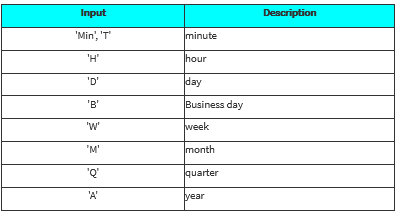


Downsampling Data

Sekarang akan dicoba melakukan proses downsampling pada dataset 'https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv' yang telah di load sebelumnya.

Tugas Praktek:

Kerjakanlah proses downsampling

    1.Daily to monthly dan apply mean
    2.Daily to yearly dan apply sum


In [42]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())

Dataset sebelum di-downsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-0

In [46]:
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_monthly = gaq.resample('M').mean()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_monthly.head())
# [2] Downsampling dari daily to quaterly dan kita hitung minimumnya untuk tiap quarter
gaq_yearly = gaq.resample('A').sum()
print('Downsampling daily to quaterly - min (5 teratas):\n', gaq_yearly.head())

Downsampling daily to weekly - max (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-06-30 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-07-31 00:00:00+00:00    NaN       NaN        NaN                     NaN
2014-08-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    NaN       NaN        NaN                     NaN
Downsampling daily to quaterly - min (5 teratas):
                                    value      latitude     longitude  \
timestamp                                                              
2014-12-31 00:00:00+00:00      16.800000     51.767000     34.932000   
2015-12-31 00:00:00+00:00     319.209800     94.623416    311.398430   
2016-12-31 00:00:00+00:00   11356.389400   3172.039550  -6925.7373

# Upsampling Data

Di bagian sebelumnya kita telah melakukan proses downsampling. Proses upsampling akan kita bahas dalam bagian untuk dataset yang masih sama.

In [47]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

# Resampling by Frequency

Pada bagian ini akan mempelajari bagaimanakah caranya me-resampling data (baik upsampling atau downsampling) berdasarkan frekuensi, misalnya sekali 2 minggu, tiap 12 jam, dsb.

Kondisi awal data yang dimiliki :

In [48]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())

Dataset sebelum di-resampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

Tugas Praktek:

Kerjakanlah proses data awal resampling dari daily to bi-monthly, kemudian hitung rata-ratanya, jika ada nilai NaN maka dapat diisi dengan fillna method = 'bfill'

In [49]:
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


# Visualisasi

Selanjutnya untuk memvisualisasikan dengan menggunakan library matplotlib dataframe yang telah diolah (seperti yang telah dipelajari dari bab pertama hingga subbab sebelumnya di bab ini).
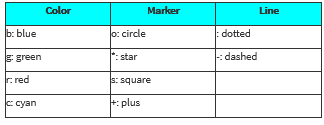
Terdapat beberapa plot styles yang dapat diterapkan dalam pembuatan visualisasi di matplotlib

Visualisasi tentang average jumlah masing-masing polutan berdasarkan bulan waktunya.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')

[1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom

In [51]:
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp', 'pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())


Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


[2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart

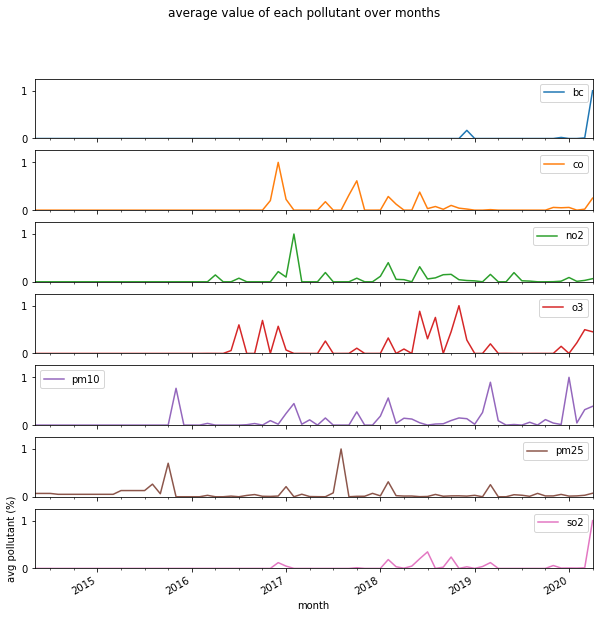

In [52]:
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10, 10), #ukuran canvas 10px x 10px
   ylim = (0, 1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

# Performa Penjualan di Setiap Cabang - Part 1

Diberikan 4 csv files yang isinya retail data untuk tiap Quarter:

    1.csv (data dari bulan January - March)       --> https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_1_until_3.csv
    2.csv (data dari bulan April - June)              --> https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_4_until_6.csv
    3.csv (data dari bulan July - September)      --> https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_7_until_9.csv
    4.csv (data dari bulan October - December)  --> https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_10_until_12.csv

 

Goal: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

 

Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

        a.Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
        b.Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
        c.Jika sama digabungkan.
        d.Cek informasi dataframe yang telah digabungkan
        e.Statistik deskriptif dari dataframe yang telah digabungkan.

Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_1_until_3.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_4_until_6.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_7_until_9.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_10_until_12.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

C:\Users\ASUS Series\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


PENGECEKAN DATA


   order_id order_date  customer_id             city     province product_id  \
0   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P0520   
4   1612339   01-01-19        18055  Jakarta Selatan  DKI Jakarta      P1513   

     brand  quantity  item_price  total_price  
0  BRAND_C         4     1934000      7736000  
1  BRAND_V         8      604000      4832000  
2  BRAND_G        12      747000      8964000  
3  BRAND_B        12      450000      5400000  
4  BRAND_G         3     1500000      4500000  
Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')
Kolom retail_data2: Index(['ord

# Performa Penjualan di setiap Cabang - Part 2

Melanjutkan penyelesaian persoalan ke langkah berikutnya

[3] Transformasi Data 

        a.Jika ada data yang tidak seharusnya maka dapat dibuang
        b.Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
        c.Cek kembali informasi dataframe 
        d.Tampilkan kembali statistik deskriptif dari dataframe

Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

In [54]:
# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
         order_id order_date  customer_id     city province product_id  \
83664  undefined   06-09-19            0  unknown  unknown      P0153   
83665  undefined   06-09-19            0  unknown  unknown      P0153   

         brand  quantity  item_price  total_price  
83664  BRAND_A         1 -3871709000  -3871709000  
83665  BRAND_A         1 -3871709000  -3871709000  

order_id yang bernilai undefined:
         order_id order_date  customer_id     city province product_id  \
83663  undefined   06-09-19            0  unknown  unknown      P0153   

         brand  quantity  item_price  total_price  
83663  BRAND_A         1  3871733000   3871733000  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 508554 entries, 0 to 201825
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     508554 non-null  int64         
 1   order

# Performa Penjualan di setiap Cabang - Part 3

Mari lanjutkan ke langkah berikutnya

[4]. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)

[5]. Mengelompokkan data berdasarkan order_date dan province yang sudah difilter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)

[6]. Melakukan unstack untuk mendapatkan order_date di bagian baris dan province di bagian column

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

In [56]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
# Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
  'order_id': 'nunique',
  'customer_id': 'nunique',
  'product_id': 'nunique',
  'brand': 'nunique',
  'total_price': sum
})
# Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     17        17      259     22  1877858000
           Jawa Barat      10         9      194     22  1290147000
           Jawa Tengah      4         3       49     15  1813991000
           Jawa Timur       6         6       63     19   663106000
           Yogyakarta       2         2       56     19   549622000

unstack_city_province (5 dat

# Performa Penjualan di setiap Cabang - Part 4

Ayo lanjutkan ke langkah berikutnya:

[7]. Slicing data untuk masing-masing measurement (kolom), misal: kolom order

[8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

In [57]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         17.0        10.0          4.0         6.0         2.0
2019-01-03         11.0         4.0         10.0         5.0         6.0
2019-01-04         30.0         7.0          8.0         1.0         8.0
2019-01-05         21.0         8.0          2.0         3.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    21.526316    8.684211     4.421053    3.473684    4.368421
2019-02-28    24.391304    8.173913     3.652174    3.869565    4.130435
2019-03-31    25.111111    7.481481     3.703704    4.370370    3.740741
2019-04-30    25.884615    9.807692     4.538462    4

# Performa Penjualan di setiap Cabang - Part 5

Sekarang dilanjutkan untuk langkah #[9] yaitu menampilkan grafik dari langkah #[8] yang telah dilakukan.

[9]. Plot untuk hasil pada langkah #[8]

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

 

Output untuk langkah [9]

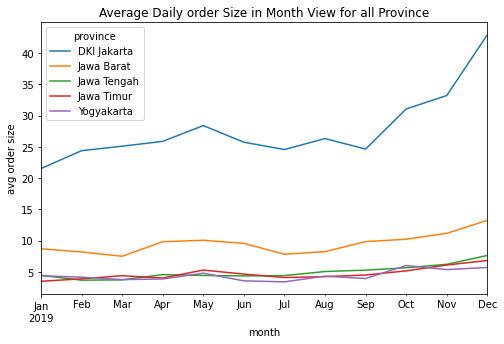

In [58]:
import matplotlib.pyplot as plt

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

Dapat dilihat bahwa avg order size untuk DKI Jakarta tertinggi dan terus memiliki kenaikan, disusul oleh Jawa Barat dan kemudian 3 sisanya hampir berada dalam angka yang rata-rata sama

# Performa Penjualan di setiap Cabang - Part 6

Langah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

Mari memulai dengan membuat sebuah perulangan dengan dataframe unstack_city_province yang digunakan (hasil dari langkah ke 5 di part 2).

 

Visualisasi yang diharapkan adalah:

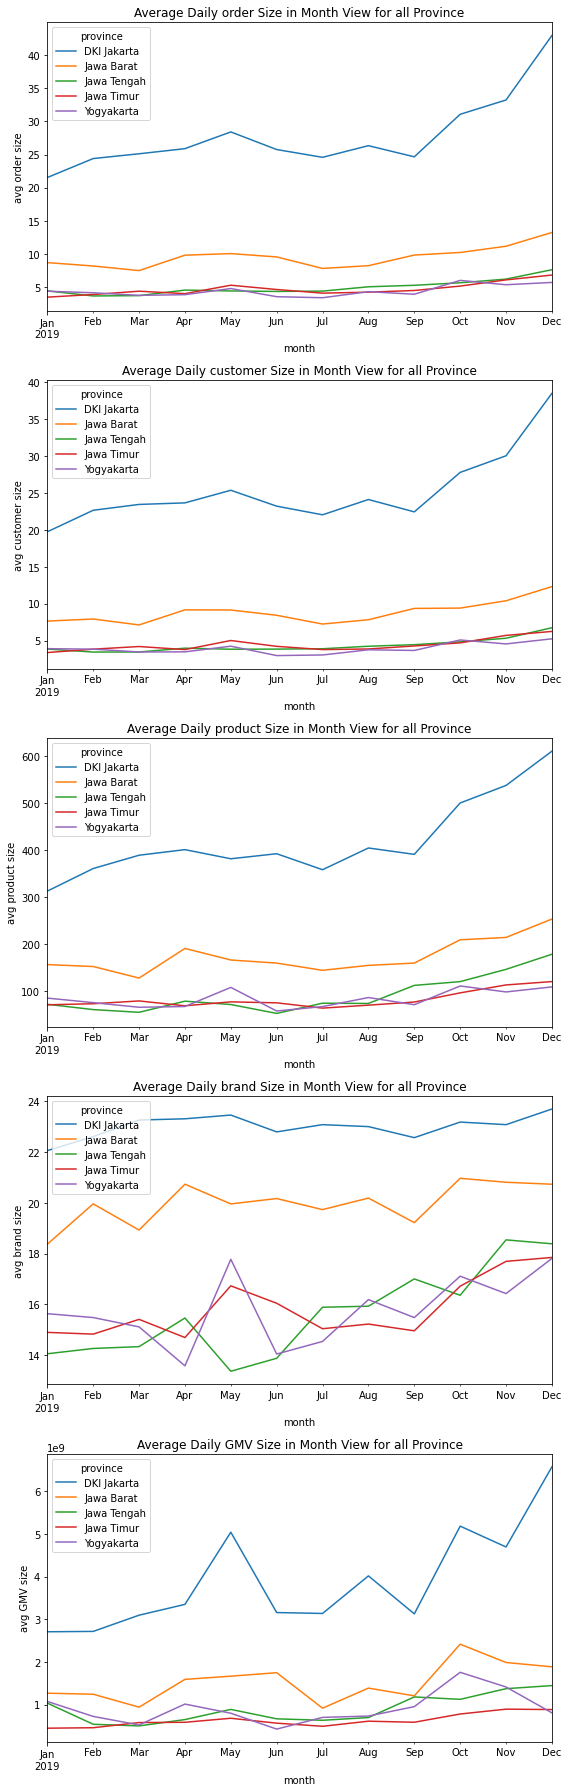

In [59]:
import matplotlib.pyplot as plt

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

# Evaluasi Andra untuk Project yang Telah Disubmit

Aku baru selesai mengecek ulang hasil kerjaku sebelum kuberikan pada Andra. Sejauh pemeriksaanku semua tampak baik-baik saja. Aku pun menutup laptopku dan membawanya ke ruangan Andra. Harus kuakui, aku cukup berdebar-debar! Walaupun proyek pertama berjalan lancar, tetap saja rasanya tegang membayangkan tanggapan Andra terhadap hasil kerjaku. Semoga tidak mengecewakan. 


“Ndra, maaf ganggu. Ini hasil proyek kemarin sudah selesai. Aku menganalisis rata-rata jumlah order, customer, produk, brand, dan GMV per hari dalam bulanan untuk 5 provinsi besar di Pulau Jawa sesuai rikues. Mau dicek dulu?”


“Boleh, coba tolong dibawa ke mari laptop kamu.” 


Selang beberapa menit, Andra menyahut “Saya mau tanya. Kamu pakai define function di kodemu, gunanya untuk apa?”


“Buat automate pembuatan dan penyimapanan grafik, Ndra. Jadi tinggal state saja dataframe-nya yang mana dan pengelompokkannya seperti apa.” jelasku. Ujian tanya jawab telah dimulai! Andra memang tipikal mentor yang akan menguji hasil pekerjaan. Perlahan cara ini melatihku untuk mengambil keputusan dan langkah yang benar-benar matang.


“Oke. Kenapa kamu enggak pakai command saja yang diulang sampai 5 kali kepada 5 measurement yang berbeda?” 


“Soalnya pakai looping akan lebih mudah, Ndra. Aku tinggal mengganti order pada Part 3 menjadi sebuah variable bernama measurement, lalu lakukan for loop untuk diulang ke semua measurement yang ada,” jawabku mantap.


Andra tersenyum. “Oke, sepertinya kamu benar-benar tahu apa yang kamu lakukan. Akan saya bawa ke rapat nanti untuk dibahas dengan kepala cabang, saya akan undang kamu ke rapat juga.”


Aku mengangguk antusias. 

# Hasil Belajarku :)

Walau harus bekerja keras, aku cukup puas dengan hasil kerjaku hari ini. Aku memandangi kode final yang sudah selesai kukerjakan. Diam-diam ada perasaan bangga menyelip di benakku! YES!

Akhirnya, aku telah menyelesaikan modul Data Manipulation with Pandas - Part 2. Materi-materi yang telah kupelajari dan praktekkan dalam modul ini aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) untuk:

    1.Dapat menerapkan teknik penggabungan data antar Series dan Dataframe dengan menggunakan concat, merge dan join.
    2.Dapat memahami konsep dan menerapkan teknik pivot, melt, stackdan unstack pada dataframe untuk memformat ulang bentuk data.
    3.Dapat memahami konsep dan menerapkan teknik groupbydan aggregation untuk mengurangi jumlah data.
    4.Mengenal dan memahami konsep time series di Pandas
    5.Latihan dalam mengerjakan project bisnis sederhana menggunakan pandas

 

Ada juga sejumlah catatan yang perlu aku ingat, yaitu

    1.Jikalau terdapat berbagai multiple source untuk extract 1 informasi, maka pastikan struktur datanya adalah sama, list column dan data types.
    2.Mengerti business understanding nya sehingga jika diperlukan melakukan join maka bisa melakukan join dengan efektif dan tepat
    3.Mengerti tujuan analisisnya sehingga bisa melakukan aggregation dan transform data (pivot, melt, etc) data dengan tepat dan efektif
    4.Sebisa mungkin selalu set index pada kolom datetime sehingga slicing menjadi lebih mudah dan melakukan hal lain seperti downsampling ataupun upsampling
    5.Selalu gunakan automation jika memungkinkan karena itu akan mempermudah hidupmu dan menghemat waktu

 

Pesan dari data mentor Karl Christian

“Data Manipulation is redundant tasks if you have to specify all the parameters one by one, the key is trying to figure out the first phase, then replicate that command become a function that you can call to create a scalable output. This process can be called as Automation.”  By KARL CHRISTIAN, 2020